In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.linear_model import LinearRegression

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn import metrics

In [2]:
location = "https://github.com/gridflowai/gridflowAI-datasets-icons/raw/master/AI-DATASETS/01-MISC/Advertising.csv"

In [3]:
# load the training data from glass data set
df_training = pd.read_csv(location)

df_training.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df_training.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = df_training[feature_cols]

# select a Series from the DataFrame
y = df_training['sales']

In [6]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [7]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


In [11]:
from sklearn.model_selection import learning_curve

In [12]:
# Define a function to plot the learning curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
    )
    train_scores_mean = -np.mean(train_scores, axis=1)
    valid_scores_mean = -np.mean(valid_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training error')
    plt.plot(train_sizes, valid_scores_mean, 'o-', label='Validation error')
    plt.xlabel('Training examples')
    plt.ylabel('Mean squared error')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

In [13]:
# Initialize the linear regression model
model = LinearRegression()

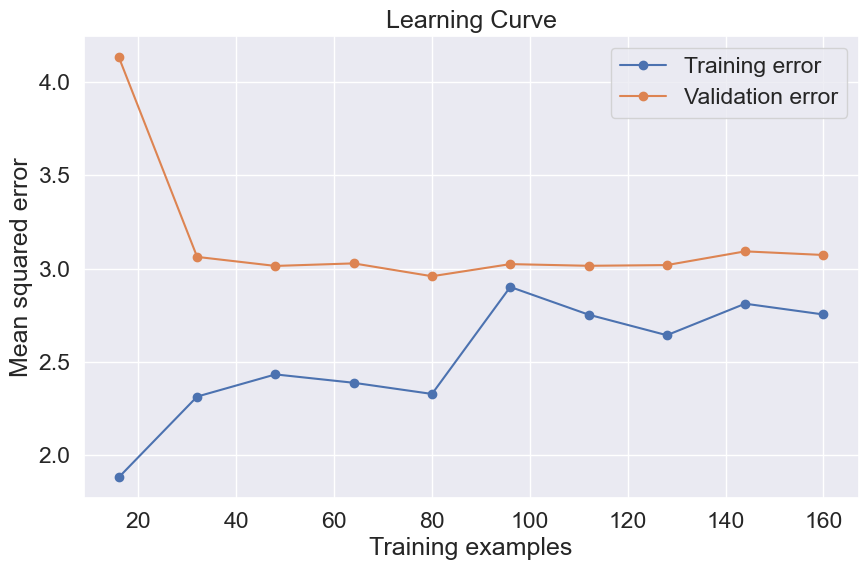

In [14]:
# Plot the learning curve
plot_learning_curve(model, X, y)